## Provided the dataset "Supermart Grocery Sales - Retail Analytics Dataset". Using python answer the
following questions:
1. Which region has the most sales?
2. Which region has the highest profit?
3. Who is the most frequeny customer?
4. Among the categories, "Beverages", "Bakery", and "Snacks". Which is more profitable in South region?
5. Plot the sales of the store according to order date. Using linear regression, find if sales is increasing or
decreasing?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_csv('Supermart Grocery Sales.csv')
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


In [6]:
df.describe()

,Sales,Discount,Profit
count,9994.000000,9994.000000,9994.000000
mean,1496.596158,0.226817,374.937082
std,577.559036,0.074636,239.932881
min,500.000000,0.100000,25.250000
25%,1000.000000,0.160000,180.022500
50%,1498.000000,0.230000,320.780000
75%,1994.750000,0.290000,525.627500
max,2500.000000,0.350000,1120.950000


In [7]:
df.isnull().sum()

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64

### Tasks:

1. Which region has the most sales?


In [11]:
region_sales = df.groupby('Region')['Sales'].sum()   
max_sales_region = region_sales.idxmax()
max_sales_value = region_sales.max()
print(f"The region with the most sales is \"{max_sales_region}\" with sales amounting to {max_sales_value}.")


The region with the most sales is "West" with sales amounting to 4798743.


2. Which region has the highest profit?


In [12]:
region_profit = df.groupby('Region')['Profit'].sum()
max_profit_region = region_profit.idxmax()
max_profit_value = region_profit.max()
print(f"The region with the highest profit is \"{max_profit_region}\" with profit amounting to {max_profit_value:.2f}.")

The region with the highest profit is "West" with profit amounting to 1192004.61.


3. Who is the most frequeny customer?


In [19]:
customer_frequency = df['Customer Name'].value_counts()
most_frequent_customer = customer_frequency.idxmax()
frequency_count = customer_frequency.max()
print(f"The most frequent customer is \"{most_frequent_customer}\" with {frequency_count} orders.")


The most frequent customer is "Amrish" with 227 orders.


4. Among the categories, "Beverages", "Bakery", and "Snacks". Which is more profitable in South region?


In [22]:
south_df = df[(df['Region'] == 'South') & (df['Category'].isin(['Beverages', 'Bakery', 'Snacks']))]
category_profit = south_df.groupby('Category')['Profit'].sum()
most_profitable_category = category_profit.idxmax()
most_profitable_value = category_profit.max()
print(f"In the South region, the most profitable category among Beverages, Bakery, and Snacks is \"{most_profitable_category}\" with a profit of {most_profitable_value:.2f}.")

In the South region, the most profitable category among Beverages, Bakery, and Snacks is "Snacks" with a profit of 94979.87.


5. Plot the sales of the store according to order date. Using linear regression, find if sales is increasing or
decreasing?

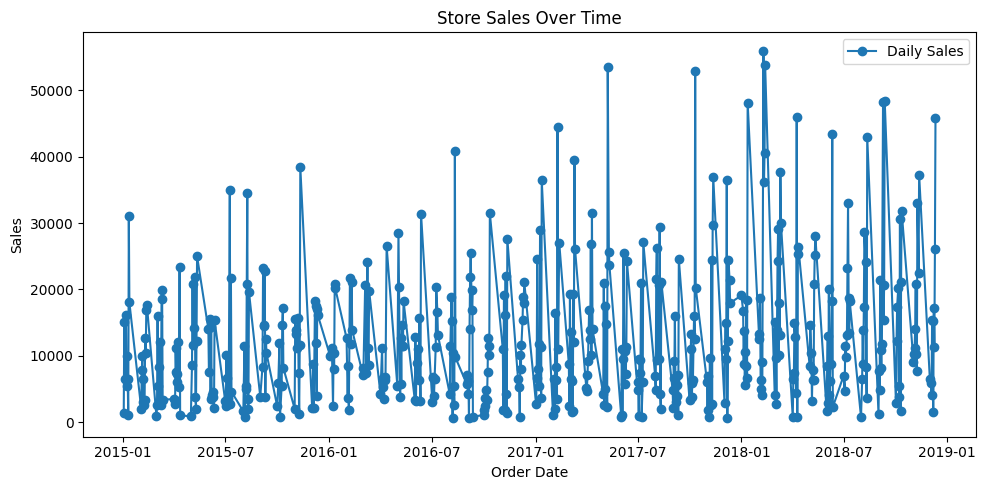

In [23]:
# Convert 'Order Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True, errors='coerce')

# Group by date and sum sales
daily_sales = df.groupby('Order Date')['Sales'].sum().reset_index()

# Plot sales over time
plt.figure(figsize=(10,5))
plt.plot(daily_sales['Order Date'], daily_sales['Sales'], marker='o', linestyle='-', label='Daily Sales')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.title('Store Sales Over Time')
plt.legend()
plt.tight_layout()
plt.show()

In [27]:
# Linear regression to see trend
from sklearn.linear_model import LinearRegression

# Prepare data for regression
daily_sales = daily_sales.dropna()
X = (daily_sales['Order Date'] - daily_sales['Order Date'].min()).dt.days.values.reshape(-1, 1)
y = daily_sales['Sales'].values

model = LinearRegression()
model.fit(X, y)
trend = model.predict(X)

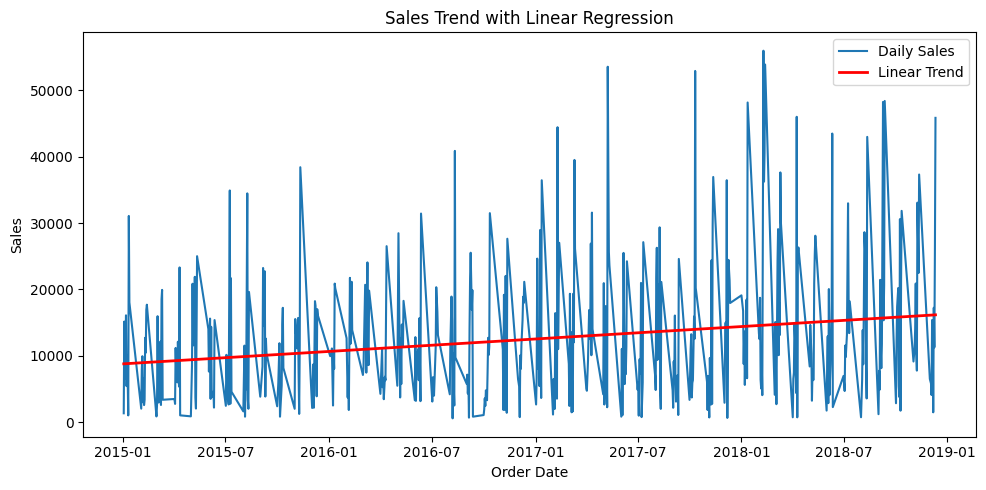

In [ ]:
# Plot with regression line
plt.figure(figsize=(10,5))
plt.plot(daily_sales['Order Date'], y, label='Daily Sales')
plt.plot(daily_sales['Order Date'], trend, color='red', linewidth=2, label='Linear Trend')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.title('Sales Trend with Linear Regression')
plt.legend()
plt.tight_layout()
plt.show()


In [25]:

# Print trend direction
if model.coef_[0] > 0:
    print("Sales are increasing over time.")
elif model.coef_[0] < 0:
    print("Sales are decreasing over time.")
else:
    print("Sales are stable over time.")

Sales are increasing over time.
